We will be following steps as mentioned below to predict the tag of given title of the news:

Texts  ==>  Stop words removal ==> Punctuation free ==> Word Lemmatization ==> Digit removal ==> Feature Extraction (Tf-Idf) ==> Model training

In [2]:
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv('google_data.csv')

In [10]:
df.head(5)

,id,title,Published_on,News_agency,URL,summary,Country,language,tag
0,0,Alexei Navalny death latest: Putin critic’s ‘b...,"Mon, 19 Feb 2024 00:01:00 GMT",The Independent,https://news.google.com/rss/articles/CBMic2h0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World
1,1,U.S. military reports 1st Houthi unmanned unde...,"Sun, 18 Feb 2024 22:23:17 GMT",CBS News,https://news.google.com/rss/articles/CBMiW2h0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World
2,2,The latest on the Israel-Hamas war: Live updat...,"Sun, 18 Feb 2024 21:21:00 GMT",CNN,https://news.google.com/rss/articles/CBMiV2h0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World
3,3,"Russia takes full control of Avdiivka, as Kyiv...","Sun, 18 Feb 2024 16:57:00 GMT",POLITICO Europe,https://news.google.com/rss/articles/CBMiaGh0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World
4,4,Brazil's President Angers Israel After Compari...,"Sun, 18 Feb 2024 21:46:16 GMT",The New York Times,https://news.google.com/rss/articles/CBMiWmh0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World


In [58]:
df.shape

(2962, 9)

In [150]:
df['tag'].unique()

array(['World', 'Nation', 'Business', 'Technology', 'Entertainment',
       'Science', 'Sports', 'Health'], dtype=object)

In [62]:
df['tag'].nunique()

8

In [66]:
from sklearn.model_selection import train_test_split

In [70]:
train, test = train_test_split(df, test_size=0.25, stratify=df['tag'])

In [82]:
train['title'].isnull().sum()

0

In [85]:
train.head()

,id,title,Published_on,News_agency,URL,summary,Country,language,tag
37,37,Haley continues to chart course away from Trum...,"Sun, 18 Feb 2024 22:21:32 GMT",POLITICO,https://news.google.com/rss/articles/CBMiUWh0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,Nation
2721,2721,"Nieta de ""El Chapo"" Guzmán, Frida Guzmán, es c...","Mon, 19 Feb 2024 00:08:00 GMT",Marca USA,https://news.google.com/rss/articles/CBMiSGh0d...,"<ol><li><a href=""https://news.google.com/rss/a...",CA,es,Entertainment
1037,1037,VIDEO: Sus padres la abandonaron para buscar e...,"Sun, 18 Feb 2024 19:15:52 GMT",La Patilla,https://news.google.com/rss/articles/CBMifmh0d...,"<a href=""https://news.google.com/rss/articles/...",US,es,Nation
1073,1073,¿Biden o Trump? ¿Cuáles son los intereses de R...,"Sun, 18 Feb 2024 12:33:00 GMT",Univision,https://news.google.com/rss/articles/CBMihQFod...,"<ol><li><a href=""https://news.google.com/rss/a...",US,es,Nation
2957,2957,Residentes de medicina ganan concurso de trivi...,"Sun, 18 Feb 2024 05:00:00 GMT",El Siglo Panamá,https://news.google.com/rss/articles/CBMiT2h0d...,"<a href=""https://news.google.com/rss/articles/...",CA,es,Health


In [73]:
train['tag'].value_counts()

tag
Technology       315
Entertainment    313
Sports           286
Science          285
Nation           280
Health           277
World            235
Business         230
Name: count, dtype: int64

In [74]:
test['tag'].value_counts()

tag
Entertainment    105
Technology       105
Sports            95
Science           95
Nation            94
Health            92
World             79
Business          76
Name: count, dtype: int64

Removing Stop Words

In [4]:
stopset = set([each for each in stopwords.words('english') if len(each) < 3])
exclude_punctuations = set(string.punctuation)
lemma = WordNetLemmatizer()

In [36]:
def clean_string(s: str) -> str:
    tokens = word_tokenize(s)
    rem_stop = [each for each in tokens if each.lower() not in stopset]
    rem_punc = [each.translate(str.maketrans('', '', string.punctuation)) for each in rem_stop]
    lemmatized = [lemma.lemmatize(each) for each in rem_punc]
    return ' '.join(' '.join(lemmatized).replace("‘", '').replace("’", '').replace("'", '').split())
    

In [132]:
filter_df = pd.DataFrame()

In [133]:
filter_df['filtered_title'] = train['title'].apply(clean_string)

In [84]:
import re

clean_string(train.iloc[0]['title'])

'Haley continues chart course away from Trump POLITICO'

In [88]:
filter_df['filtered_title']

37      Haley continues chart course away from Trump P...
2721    Nieta de El Chapo Guzmán Frida Guzmán e captad...
1037    VIDEO Sus padre la abandonaron para buscar el ...
1073    ¿Biden Trump ¿Cuáles son los intereses de Rusi...
2957    Residentes de medicina ganan concurso de trivi...
                              ...                        
1743    Michael Bublé spotted Vij s Restaurant Vancouv...
689     Samsung frappe fort avec cette offre exception...
1190    Yailin La Más Viral enseña Tekashi 6ix9ine com...
1651    Sony Xperia 5 VI wishlist All the feature want...
1986    New study pinpoint key marker for Long COVID d...
Name: filtered_title, Length: 2221, dtype: object

In [78]:
filter_df.iloc[1]['filtered_title']

'US military report 1st Houthi unmanned underwater vessel Red Sea CBS News'

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
vectorizer = TfidfVectorizer()

In [137]:
X = vectorizer.fit_transform(filter_df['filtered_title'])

In [114]:
vectorizer.fit_transform(filter_df.iloc[0]['filtered_title'].split())

<8x7 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [138]:
X.shape

(2221, 9598)

In [91]:
from sklearn.cluster import KMeans

In [144]:
modelkmeans = KMeans(n_clusters=8, init='k-means++', max_iter=200, n_init=100)
modelkmeans.fit(X)

KMeans(max_iter=200, n_init=100)

In [139]:
test_df = pd.DataFrame()

In [140]:
test_df['filtered_title'] = test['title'].apply(clean_string)

In [129]:
test_df.iloc[0]['filtered_title']

'NCIS la vraie raison du départ de Sasha Alexander Caitlin Todd TéléLoisirs'

In [122]:
test_df.iloc[0]['filtered_title']

'NCIS la vraie raison du départ de Sasha Alexander Caitlin Todd TéléLoisirs'

In [141]:
Y = vectorizer.transform(test_df['filtered_title'])

In [115]:
vectorizer.fit_transform(test_df.iloc[0]['title'].split())

<12x11 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [142]:
Y.shape

(741, 9598)

In [146]:
precited_labels = modelkmeans.predict(Y)

In [147]:
precited_labels[0]

7

In [160]:
test[['title', 'tag']].head(2)

,title,tag
2278,NCIS : la vraie raison du départ de Sasha Alex...,Entertainment
1773,Jennifer Lopez's Hot Pink Gown Combined a Supe...,Entertainment


In [162]:
modelkmeans.labels_[2]

7

In [153]:
import numpy as np

In [154]:
np.min(modelkmeans.labels_)

0

In [163]:
modelkmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00154453,
        0.00178528],
       ...,
       [0.0025957 , 0.00097393, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00111018, 0.        , 0.00044957, ..., 0.00045103, 0.        ,
        0.        ],
       [0.00169809, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [164]:
modelkmeans.labels_

array([6, 7, 7, ..., 7, 1, 6])

In [174]:
log_train_df = pd.DataFrame()

In [ ]:
log_train_df['filtered_title'] = df['title'].apply(clean_string)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['tag'], test_size=0.25, stratify=df['tag'])

In [175]:
log_train_df['title'] = X_train.apply(clean_string)

In [176]:
log_train_df

,title
1527,Vacant structure destroyed suspicious overnigh...
236,See All The Wildest Looks From The 2024 People...
2505,El Tribunal Electoral ratifica la victoria de ...
2947,Bienestar Social ha suscrito acuerdos con 24 a...
198,Suicide Squad Kill The Justice League s Steam ...
...,...
1583,Several Canadian lottery player win big Lotto ...
1737,Chris Bassitt culture 2024 Blue Jays pitching ...
2558,Sale la luz segunda parte del reguetón cubano ...
1418,debe demorarse más el reconocimiento de la esp...


In [180]:
log_test_df = pd.DataFrame()

In [181]:
log_test_df['title'] = X_test.apply(clean_string)

In [182]:
log_test_df

,title
2913,Del total de persona con Hepatitis C el 6 corr...
1072,Desmienten supuestas autorizaciones de Estados...
234,HP Spectre x360 14 review Highend convertible ...
1928,More than bad trip Experts warn about the risk...
1062,El último escándalo de Daniel Ortega donó vali...
...,...
289,Bethenny Frankel slam Kelly Rowland for diva e...
628,Avec le Solterra Subaru négocie un virage serr...
554,Présidentielle aux EtatsUnis pourquoi Vladimir...
2062,Vol de véhicule un adolescent arrêté après une...


In [183]:
X = vectorizer.fit_transform(log_train_df['title'])

In [184]:
X.shape

(2221, 9684)

In [185]:
Y = vectorizer.transform(log_test_df['title'])

In [186]:
Y.shape

(741, 9684)

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
classifier = LogisticRegression()
classifier.fit(X, y_train)

LogisticRegression()

In [189]:
y_pred = classifier.predict(Y)

In [198]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6734143049932524


In [197]:
cm = confusion_matrix(y_test, y_pred)

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

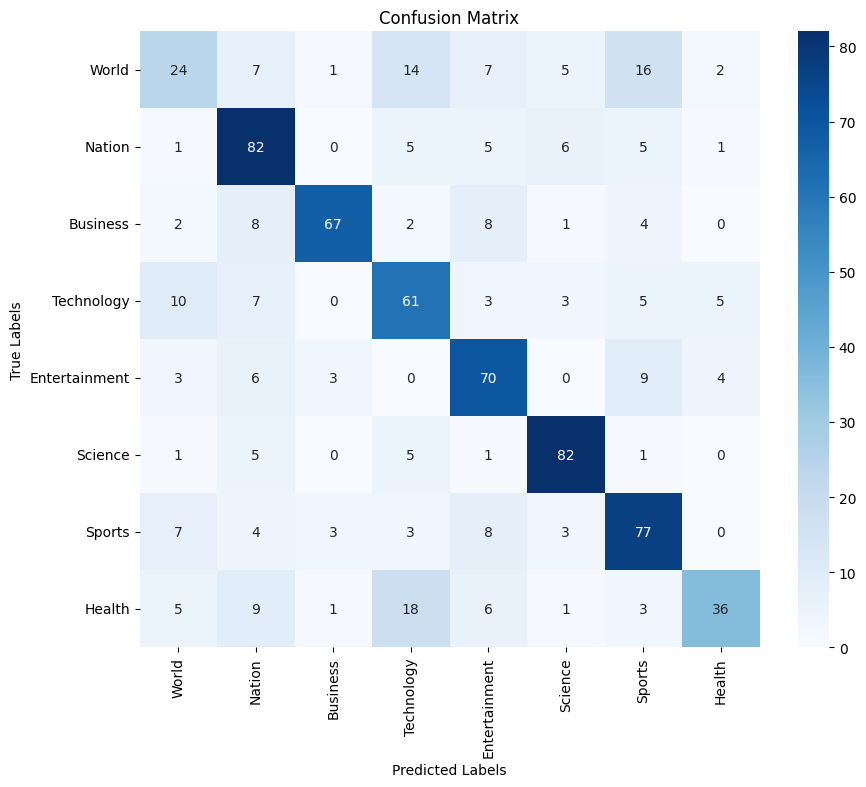

               precision    recall  f1-score   support

     Business       0.45      0.32      0.37        76
Entertainment       0.64      0.78      0.70       105
       Health       0.89      0.73      0.80        92
       Nation       0.56      0.65      0.60        94
      Science       0.65      0.74      0.69        95
       Sports       0.81      0.86      0.84        95
   Technology       0.64      0.73      0.68       105
        World       0.75      0.46      0.57        79

     accuracy                           0.67       741
    macro avg       0.68      0.66      0.66       741
 weighted avg       0.68      0.67      0.67       741



In [200]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['tag'].unique(), yticklabels=df['tag'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Display a classification report
print(classification_report(y_test, y_pred))